In [48]:
######## Imports and definitions #########

import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import pickle

sensor_list = ['TRK', 'RUA', 'RLA', 'RHA']
task_names = [
    'N-Pose Calibration',
    'Elbow Flexion Calibration',
    'Elbow Protation Calibration',
    'Wrist Flexion Calibration',
    'Wrist Deviation Calibration',
    'Shoulder Rotation Calibration',
    'Shoulder Flexion  Calibration',
    'Shoulder Abduction Calibration',
    'Scapula Elevation Calibration',
    'Scapula Protraction Calibration',
    'Elbow Flexion Task',
    'Elbow Pronation Task',
    'Shoulder Flexion Task',
    'Shoulder Abduction Task',
    'Shoulder Rotation Task',
    'Wrist Flexion Task',
    'Wrist Deviation Task',
    'Drinking Task',
    'Box Off Shelf Task',
    'Drawing Circles Task'  
]

In [50]:
######## Upload IMU Files ########
path = '..\\Sample Data\\IMU'
file_list = os.listdir(path)
data_names_dict = {}
# Make a dictionary with all filenames for each sensor
for sensor in sensor_list:
    
    data_names_dict[sensor] = []
    
    for filename in file_list:
        if sensor in filename:
            data_names_dict[sensor].append(filename)
            
# Upload data for each sensor and task

data_dict = {}
for i in range(len(task_names)):
    data_dict[i] = {'Task Name': task_names[i]}

    frame_length = []
    for sensor in range(len(sensor_list)):
                
        data_dict[i][sensor_list[sensor]] =  pd.read_csv(os.path.join(path,data_names_dict[sensor_list[sensor]][i]), skiprows=1)
        frame_length.append(len(data_dict[i][sensor_list[sensor]]))
        # print(f'Task = {task_names[i]} - {sensor} - shape={len(data_dict[i][sensor_list[sensor]])}')
  
        
    # Sensors store slightly different data points during the recording. Trim the start of all files to match frame length
    min_length = min(frame_length)
    for sensor in range(len(sensor_list)):
        sensor_data_length = len(data_dict[i][sensor_list[sensor]])
        if sensor_data_length > min_length:
            length_difference = sensor_data_length-min_length
            data_dict[i][sensor_list[sensor]] = data_dict[i][sensor_list[sensor]].drop(range(length_difference))
        
        
with open('1.Raw_IMU_Data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Unnamed: 15
1,1,3433422215,0.877931,-0.044590,-0.458465,-0.130698,8.122138,0.529214,5.826108,-3.759799,-1.539505,-1.739757,-0.897705,0.154785,-0.215332,
2,2,3433430548,0.877922,-0.044618,-0.458424,-0.130898,8.102398,0.501620,5.656584,-1.865626,0.002305,-2.038163,-0.896973,0.151123,-0.213867,
3,3,3433438881,0.877963,-0.044464,-0.458318,-0.131047,8.076990,0.523613,5.549481,0.541049,1.399126,-2.444507,-0.898193,0.151123,-0.216309,
4,4,3433447214,0.877892,-0.044448,-0.458371,-0.131344,8.039203,0.511603,5.709822,-1.800694,-1.375011,-3.637644,-0.898926,0.150146,-0.214355,
5,5,3433455547,0.877710,-0.044564,-0.458602,-0.131710,8.063779,0.437817,5.751141,-3.589976,-4.426793,-3.960639,-0.896484,0.150635,-0.216309,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,1518,3446063376,0.895123,-0.059179,-0.418535,-0.141793,7.244853,0.774254,6.619095,-13.101851,10.068651,-7.514618,-0.873047,0.185547,-0.289551,
1519,1519,3446071709,0.895381,-0.059411,-0.417580,-0.142877,7.108980,0.657480,6.479593,-11.017441,13.157346,-10.578157,-0.873291,0.191162,-0.288574,
1520,1520,3446080042,0.895621,-0.059290,-0.416696,-0.144003,7.029371,0.491024,6.613804,-6.710508,12.916390,-13.171368,-0.872559,0.183594,-0.291016,
1521,1521,3446088375,0.895795,-0.059187,-0.415873,-0.145334,6.979151,0.277876,6.541343,-8.110251,11.921535,-15.829618,-0.873535,0.181396,-0.294434,


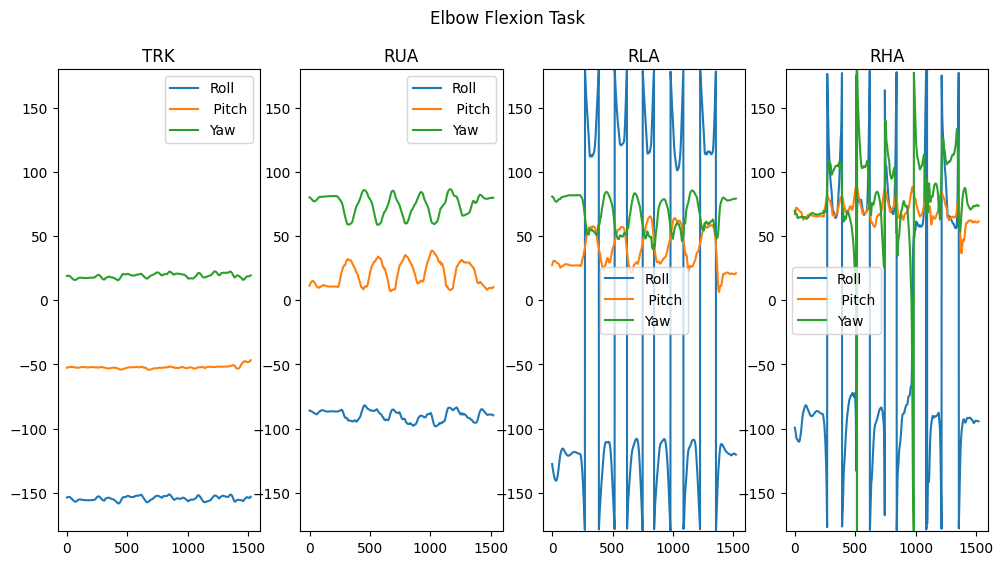

In [52]:
###### Plot Euler Angles from all sensor data for each task #######
task_number = 10


sequence = 'XYZ'
task_to_plot = data_dict[task_number]
fig, axList = plt.subplots(nrows=1, ncols=len(sensor_list), figsize = (12,6))
display(task_to_plot['TRK'])
for i in range(len(sensor_list)):
    quaternion = R.from_quat(task_to_plot[sensor_list[i]][['Quat_W', 'Quat_X', 'Quat_Y', 'Quat_Z']].to_numpy())
    euler_angles = quaternion.as_euler(sequence)
    axList[i].plot(euler_angles*180./3.14)
    axList[i].set_title(sensor_list[i])
    axList[i].set_ylim(-180,180)
    axList[i].legend(['Roll',' Pitch', 'Yaw'])
fig.suptitle(task_to_plot['Task Name'])    
fig.savefig('Figures\\Sensors Uncalibrated.svg',format='svg')